## Question 1: -

Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

**Note** - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input - string = “write write write all the number from from from 1 to 100”

Example output - 5

Explanation - From the given string we can note that the most frequent words are “write” and “from” and
the maximum value of both the values is “write” and its corresponding length is 5


In [57]:
# Ans

def highest_frequency_word(string):
    
    '''
    Description: This function will return the length of the maximum repeted word in a string
    =========================================================
    Params:
    string : string containing multiple words
    =========================================================
    returns length of word in integer
    '''
    words = string.split()    # Getting list of words splitted with space
    d = dict()
    
    # Storing each word with a count in dictionary
    for word in words:
        if word in d:
            d[word] += 1
        else:
            d[word] = 1
            
    # Sorting the key value pairs
    sorted_count = sorted(d.items(), key=lambda kv: kv[1])  
    
    # considering the maximum count and largest word for requirement
    max_count = sorted_count[-1][1]
    largest_word = sorted_count[-1][0]
    #print(largest_word, max_count)
    
    res = dict()
    
    # Storing the key value pair with maximum repeatation to res
    res = {k:v for (k,v) in d.items() if v == max_count}
    #print(res)
    
    # Getting the largesrt word 
    largest_word = [word for word in res if len(word) > len(largest_word)]
    
    #print(largest_word)
    return len(largest_word[0])

#### Test cases-1

Input-1, string = “NLP ANN ANN ANN NLP NLP PYTHON SQL PYTHON SQL PYTHON SQL DL”

Output - 6

Explanation - From the given string we can note that the most frequent words are "NLP", "ANN", “PYTHON” and “SQL” and the maximum value of all the values is “PYTHON” and its corresponding length is 6.

In [58]:
if __name__ == '__main__':
    string = input()
    print(highest_frequency_word(string)) 

NLP ANN ANN ANN NLP NLP PYTHON SQL PYTHON SQL PYTHON SQL DL
6


#### Test cases-2

Input-2, string = “DataScientist ML_Engineer DataEngineer DataScientist ML_Engineer DataEngineer DataScientist ML_Engineer”

Output - 13

Explanation - From the given string we can note that the most frequent words are "DataScientist” and “ML_Engineer” and the maximum value of all the values is “DataScientist” and its corresponding length is 13.

In [59]:
if __name__ == '__main__':
    string = input()
    print(highest_frequency_word(string)) 

DataScientist ML_Engineer DataEngineer DataScientist ML_Engineer DataEngineer DataScientist ML_Engineer
13


## Question 2: -

Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

**Note** - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }

Example output 1- YES

Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves
character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }

Example output 2 - NO


In [5]:
# Ans

def isValidString(s):
    '''
    Description: This function will check if the string is valid or not based on number of occurrance
    =========================================================
    Params:
    string : string
    =========================================================
    returns 'YES' or 'NO'
    '''
    char_count = {}
    for char in s:
        char_count[char] = char_count.get(char, 0) + 1    # Getting count for each character
    
    counts = set(char_count.values())
    
    # Checking the count of characters
    if len(counts) == 1:
        return "YES"  # All characters have the same count
    
    if len(counts) > 2:
        return "NO"  # More than two different counts
    
    count1, count2 = counts
    if (count1 == 1 and list(char_count.values()).count(count1) == 1) or (count2 == 1 and list(char_count.values()).count(count2) == 1):
        return "YES"  # Removing one character with count1 or count2 would make it valid
    
    return "NO"  # Not possible to make the string valid by removing one character

#### Test cases-1

Input 1 - s = “aabbccd”. This is a valid string because after removing 1 frequency of 'd', The left character frequencies are { “a”: 2, “b”: 2, “c”: 2}

Example output 1- YES

In [54]:
if __name__ == '__main__':
    s = input()
    print(isValidString(s)) 

aabbccd
YES


#### Test cases-2

Input 2 - s = “xyyz”. This is not a valid string because after removing 1 frequency of 'y', The left character frequencies are { “x”: 1, “y”: 2, “z”: 1}

Example output 2- NO

In [55]:
if __name__ == '__main__':
    s = input()
    print(isValidString(s)) 

xyyz
NO


## Question 3: -

Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.

**Note** - Write comments wherever necessary explaining the code written.

Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

**Data Attributes - id:** 

- Identification Number - int 
- num: Number of the Pokémon in the official Pokédex - int 
- name: Pokémon name - string 
- img: URL to an image of this Pokémon - string 
- type: Pokémon type -string 
- height: Pokémon height - float
- weight: Pokémon weight - float 
- candy: type of candy used to evolve Pokémon or given when transferred - string 
- candy_count: the amount of candies required to evolve - int
- egg: Number of kilometers to travel to hatch the egg - float 
- spawn_chance: Percentage of spawn chance (NEW) - float 
- avg_spawns: Number of this pokemon on 10.000 spawns (NEW) - int
- spawn_time: Spawns most active at the time on this field. Spawn times are the same for all time zones and are expressed in local time. (NEW) - “minutes: seconds” 
- multipliers: Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int
- weakness: Types of Pokémon this Pokémon is weak to - list of strings 
- next_evolution: Number and Name of successive evolutions of Pokémon - list of dict 
- prev_evolution: Number and Name of previous evolutions of Pokémon - - list of dict

In [12]:
# Ans

# Importing libraries
import pandas as pd
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry



# Function to download data
def download_data(link):  
    '''
    Description: This function will return the data in json format
    =========================================================
    Params:
    link : link to get  data
    =========================================================
    returns data in json format
    '''
    response = requests.get(link)    # Getting the response
    data = response.json()    # Converting response to json format
    return data

def convert_to_excel(data):
    '''
    Description: This function converts the json data and saves in Excel format 
    =========================================================
    Params:
    data : link to get  data
    =========================================================
    '''
    df = pd.json_normalize(data['pokemon'])    # Normalizing semi-structured JSON data into a flat table.
    df.to_excel('pokedex.xlsx', index=False)    # saving dataframe to excel file by excluding the row numbers from its first column
    
if __name__ == '__main__':
    link = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
    # Function call
    data = download_data(link)
    convert_to_excel(data)

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /Biuni/PokemonGO-Pokedex/master/pokedex.json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000022414103CD0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

### Link to the data is not working, hence leaving this question after multiple tries

## Question 4 -

Write a program to download the data from the link given below and then read the data and convert them into
the proper structure and return it as a CSV file.

Link - https://data.nasa.gov/resource/y77d-th95.json

Note - Write code comments wherever needed for code understanding.

Sample Data -
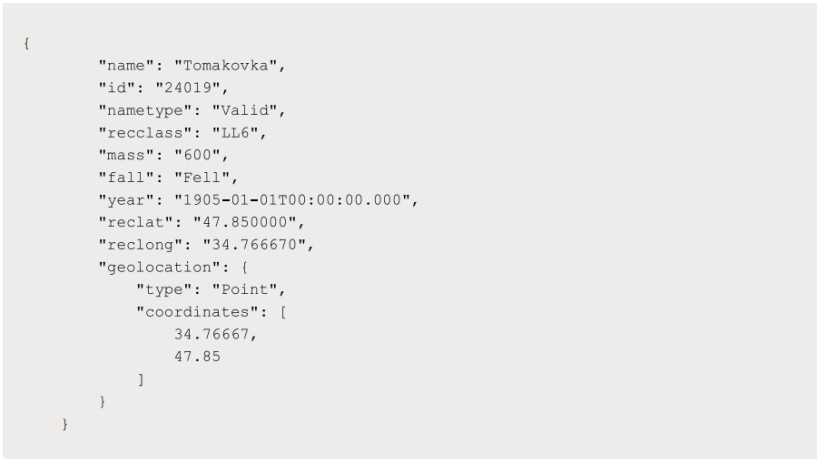

Excepted Output Data Attributes
- Name of Earth Meteorite - string 
- id - ID of Earth Meteorite - int 
- nametype - string 
- recclass - string
- mass - Mass of Earth Meteorite - float 
- year - Year at which Earth Meteorite was hit - datetime format 
- reclat - float 
- recclong - float 
- point coordinates - list of int


In [13]:
# Ans

# Importing libraries
import pandas as pd
import requests
from datetime import datetime
import csv

def download_data(link):
    '''
    Description: This function will return the data in json format
    =========================================================
    Params:
    link : link to get  data
    =========================================================
    returns data in json format
    '''
    response = requests.get(link)    # Getting the response
    data = response.json()    # Converting response to json format
    return data

def process_data(data):
    '''
    Description: This function will return the processed data by changing their datatypes
    =========================================================
    Params:
    data : raw data
    =========================================================
    returns processed data
    '''
    processed_data = []
    for item in data:
        # Handling missing 'geolocation' attribute
        if 'geolocation' not in item:   
            continue    # Skipping the item if 'geolocation' is missing
        processed_item = {
            'name' : item.get('name', ''),   # Handling missing 'name' attribute
            'id': int(item.get('id', 0)),   # Handling missing 'id' attribute
            'nametype': item.get('nametype', ''),   # Handling missing 'nametype' attribute    
            'recclass': item.get('recclass', ''),   # Handling missing 'recclass' attribute
            'mass': float(item.get('mass', 0.0)),     # Handling missing 'mass' attribute
            'year': datetime.strptime(item.get('year', '1900-01-01T00:00:00.000')[:10], '%Y-%m-%d'),   # Handling missing 'year' attribute
            'reclat': float(item.get('reclat', 0.0)),   # Handling missing 'reclat' attribute
            'reclong': float(item.get('reclong', 0.0)),   # Handling missing 'reclong' attribute
            'coordinates': [float(item['geolocation']['coordinates'][1]), float(item['geolocation']['coordinates'][0])]
        }
        processed_data.append(processed_item)
    return processed_data

def save_as_csv(data):
    '''
    Description: This function will save the data in a csv file
    =========================================================
    Params:
    data : data
    =========================================================
    '''
    fieldnames = ['name', 'id', 'nametype', 'recclass', 'mass', 'year', 'reclat', 'reclong', 'coordinates']
    with open('meteorites.csv', 'w', newline='', encoding="utf-8") as csvfile:   # Opening csv file by handling UnicodeEncodeError
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)    # mapping dictionaries into rows of csv file
        writer.writeheader()    # To get the headers first
        writer.writerows(data)    # Writing the data
        
if __name__ == '__main__':
    url = 'https://data.nasa.gov/resource/y77d-th95.json'
    # Function call
    data = download_data(url)
    processed_data = process_data(data)
    save_as_csv(processed_data)

## Question 5 -

Write a program to download the data from the given API link and then extract the following data with
proper formatting

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

Note - Write proper code comments wherever needed for the code understanding

Sample Data -

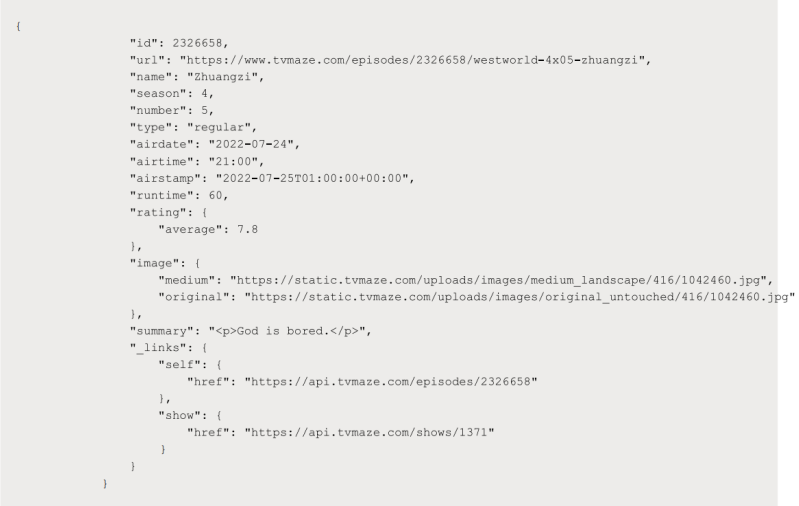

Excepted Output Data Attributes -
- id - int url - string
- name - string 
- season - int 
- number - int
- type - string 
- airdate -  date 
- format airtime - 12-hour time format
- runtime - float
- average rating - float
- summary - string
- without html tags
- medium image link - string
- Original image link - string

In [14]:
# Ans

# Importing libraries
import requests
from datetime import datetime

def download_data_tv(url):
    response = requests.get(url)
    data = response.json()
    return data

def extract_data_tv(data):
    '''
    Description: This function extracts and returns the formatted data 
    =========================================================
    Params:
    data : data
    =========================================================
    returns formatted data
    '''
    episode_data = data['_embedded']['episodes']    # accssing 'episodes' key data within '_embedded' key
    extracted_data = []
    for item in episode_data:
        extracted_item = {
            # formatting the columns as per datatype
            'id': int(item['id']),   # int format
            'url': item['url'],
            'name': item['name'],
            'season': int(item['season']),
            'number': int(item['number']),
            'type': item['type'],
            'airdate': datetime.strptime(item['airdate'], "%Y-%m-%d").date(),    # datetime format
            'airtime': datetime.strptime(item['airstamp'], "%Y-%m-%dT%H:%M:%S%z").strftime("%I:%M %p"),    # 12-hour time format
            'runtime': float(item['runtime']),    # float format
            'average_rating': float(item['rating']['average']),
            'summary': item['summary'].strip('<p>').strip('</p>'),    # Removing '<p>' and </p> from the string
            'without_html_tags_medium_image_link': item['image']['medium'],    # extracting data from 'medium' key with in 'image' key
            'original_image_link': item['image']['original']    # extracting data from 'original' key with in 'image' key
        }
        extracted_data.append(extracted_item)    # appending each set of data as row
    return extracted_data

def main():
    url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
    # Function call
    data = download_data_tv(url)
    #print(data)
    extracted_data = extract_data_tv(data)    # Getting the list of data
    for item in extracted_data:
        print(item)  # Display the extracted data

if __name__ == '__main__':
    main()

[{'id': 869671, 'url': 'https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original', 'name': 'The Original', 'season': 1, 'number': 1, 'type': 'regular', 'airdate': datetime.date(2016, 10, 2), 'airtime': '01:00 AM', 'runtime': 68.0, 'average_rating': 8.0, 'summary': "A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.", 'without_html_tags_medium_image_link': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg', 'original_image_link': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'}, {'id': 911201, 'url': 'https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut', 'name': 'Chestnut', 'season': 1, 'number': 2, 'type': 'regular', 'airdate': datetime.date(2016, 10

## Question 6 -

Using the data from Question 3, write code to analyze the data and answer the following questions 

Note 

1.Draw plots to demonstrate the analysis for the following questions for better visualizations.

2. Write code comments wherever required for code understanding

Insights to be drawn -
- Get all Pokemons whose spawn rate is less than 5%
- Get all Pokemons that have less than 4 weaknesses
- Get all Pokemons that have no multipliers at all
- Get all Pokemons that do not have more than 2 evolutions
- Get all Pokemons whose spawn time is less than 300 seconds.

Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
- Get all Pokemon who have more than two types of capabilities


In [78]:
# Ans

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json')

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

### As the link to the data is not working, and after several tries I am leaving this question to answer.

## Question 7 -

Using the data from Question 4, write code to analyze the data and answer the following questions 

Note -

1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -

- Get all the Earth meteorites that fell before the year 2000
- Get all the earth meteorites co-ordinates who fell before the year 1970
- Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [16]:
# Ans

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# Reading data
df = pd.read_csv('meteorites.csv')
print(df.head)

# Getting all the Earth meteorites that fell before the year 2000
df['year'] = pd.to_datetime(df['year'], errors='coerce')   # Getting only date from the time stamp by removing time and ignoring the errror
earth_meteorites_fell_before_2000 = df[df['year'].dt.year < 2000]    # Getting only year out of date
print(earth_meteorites_fell_before_2000)

# Getting all the earth meteorites co-ordinates who fell before the year 1970
earth_meteorites_coordinates_before_1970 = df[df['year'].dt.year < 1970]
print(earth_meteorites_coordinates_before_1970)

# Assuming that the mass of the earth meteorites was in kg, getting all those whose mass was more than 10000kg
meteorites_mass_more_than_10000kg = df[df['mass'] > 10000]
print(meteorites_mass_more_than_10000kg)

<bound method NDFrame.head of           name     id nametype               recclass      mass  \
0       Aachen      1    Valid                     L5      21.0   
1       Aarhus      2    Valid                     H6     720.0   
2         Abee      6    Valid                    EH4  107000.0   
3     Acapulco     10    Valid            Acapulcoite    1914.0   
4      Achiras    370    Valid                     L6     780.0   
..         ...    ...      ...                    ...       ...   
983   Tirupati  24009    Valid                     H6     230.0   
984    Tissint  54823    Valid  Martian (shergottite)    7000.0   
985      Tjabe  24011    Valid                     H6   20000.0   
986   Tjerebon  24012    Valid                     L5   16500.0   
987  Tomakovka  24019    Valid                    LL6     600.0   

                    year    reclat    reclong            coordinates  
0    1880-01-01 00:00:00  50.77500    6.08333      [50.775, 6.08333]  
1    1951-01-01 00:00:0

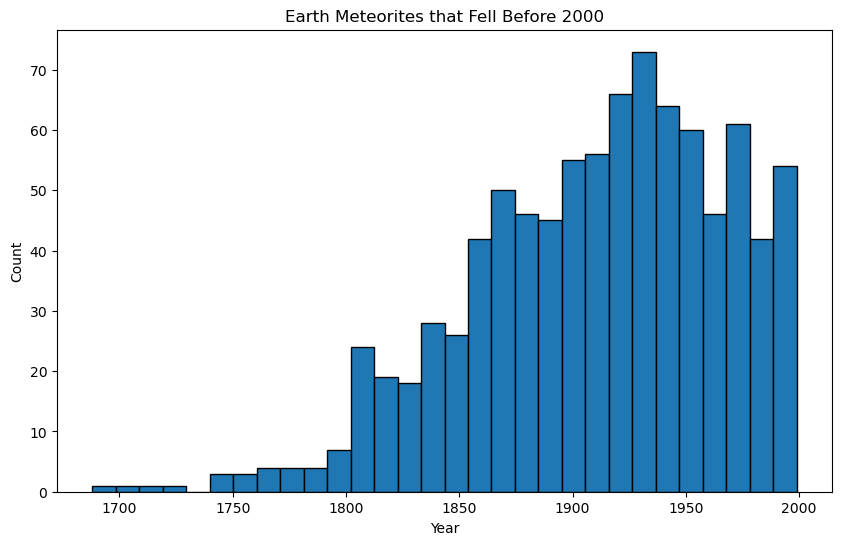

In [18]:
# 1. Earth meteorites that fell before the year 2000

plt.figure(figsize=(10, 6))
# Plotting histogram with 'bin size' = 30
plt.hist(earth_meteorites_fell_before_2000['year'].dt.year, bins=30, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Earth Meteorites that Fell Before 2000')
plt.show()

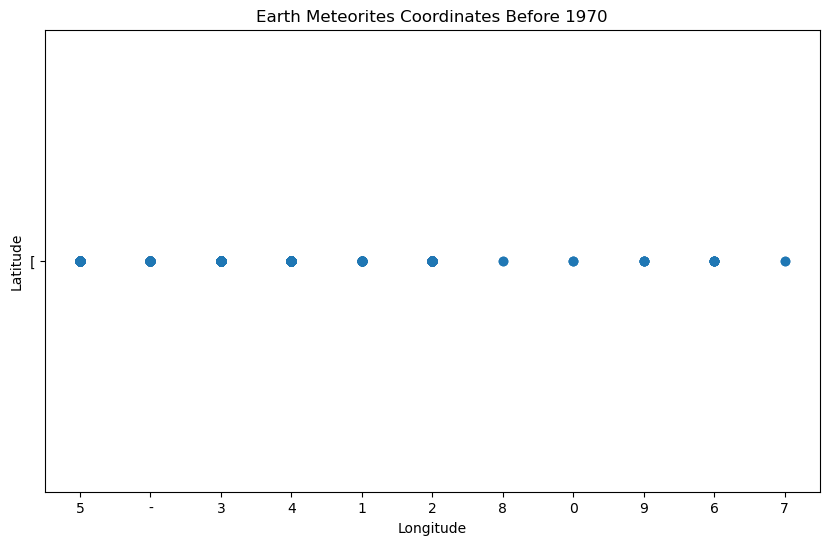

In [19]:
# 2. Earth meteorites' coordinates that fell before the year 1970

plt.figure(figsize=(10, 6))
# Plotting scatter plot 
plt.scatter(earth_meteorites_coordinates_before_1970['coordinates'].str[1], earth_meteorites_coordinates_before_1970['coordinates'].str[0])    # defining the points
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites Coordinates Before 1970')
plt.show()

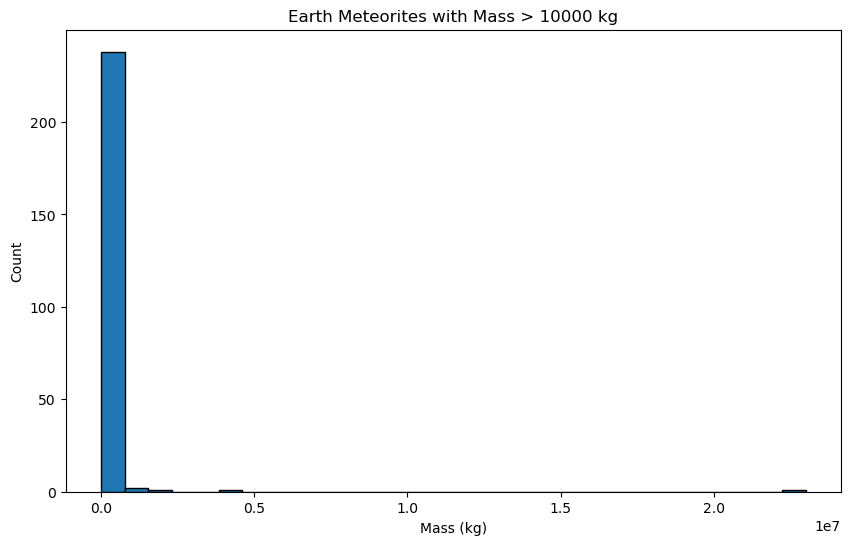

In [20]:
# 3. Earth meteorites with a mass greater than 10000 kg

plt.figure(figsize=(10, 6))
# Plotting histogram with 'bin size' = 30
plt.hist(meteorites_mass_more_than_10000kg['mass'], bins=30, edgecolor='black')
plt.xlabel('Mass (kg)')
plt.ylabel('Count')
plt.title('Earth Meteorites with Mass > 10000 kg')
plt.show()

## Question 8 -

Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -

- Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
- Get all the episode names, whose average rating is more than 8 for every season
- Get all the episode names that aired before May 2019
- Get the episode name from each season with the highest and lowest rating
- Get the summary for the most popular ( ratings ) episode in every season

In [21]:
# Ans

import csv

# Accessing the above defined functions from 'Question 5'
url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
data = download_data_tv(url)
extracted_data = extract_data_tv(data)
    
fieldnames = ['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime', 'runtime', 'average_rating', 'summary', 'without_html_tags_medium_image_link', 'original_image_link']
# Saving the extracted data to csv file
with open('tvmaze.csv', 'w', newline='', encoding="utf-8") as csvfile:   # Opening csv file by handling UnicodeEncodeError
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)    # mapping dictionaries into rows of csv file
    writer.writeheader()    # To get the headers first
    writer.writerows(extracted_data)    # Writing the data

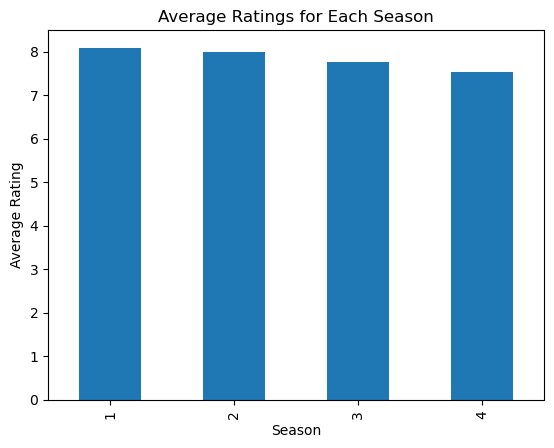

Episode Names with Average Rating > 8:
6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object
Episode Names Aired Before May 2019:
0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object
Episode Name with Highest Rating per Sea

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tvmaze.csv')

# Other way to plot directly

# Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
season_ratings = df.groupby('season')['average_rating'].mean()
season_ratings.plot(kind='bar', xlabel='Season', ylabel='Average Rating', title='Average Ratings for Each Season')
plt.show()

# Get all the episode names with average rating > 8 for every season
high_rated_episodes = df[df['average_rating'] > 8]
high_rated_episodes_names = high_rated_episodes['name']    # Getting the names from dataframe
print("Episode Names with Average Rating > 8:")
print(high_rated_episodes_names)

# Get all the episode names that aired before May 2019
df['airdate'] = pd.to_datetime(df['airdate'])    # Converting from 'object' type to datetime
before_may_2019 = df[df['airdate'] < pd.Timestamp('2019-05-01')]
before_may_2019_names = before_may_2019['name']    # Getting the names from dataframe
print("Episode Names Aired Before May 2019:")
print(before_may_2019_names)

# Get the episode name from each season with the highest and lowest rating
highest_rating_per_season = df.groupby('season')['average_rating'].idxmax()
lowest_rating_per_season = df.groupby('season')['average_rating'].idxmin()
highest_rated_episodes_names = df.loc[highest_rating_per_season, 'name']
lowest_rated_episodes_names = df.loc[lowest_rating_per_season, 'name']    # Getting the names from lowest_rating_per_season dataframe
print("Episode Name with Highest Rating per Season:")
print(highest_rated_episodes_names)
print("Episode Name with Lowest Rating per Season:")
print(lowest_rated_episodes_names)

# Get the summary for the most popular (highest rated) episode in every season
most_popular_per_season = df.groupby('season')['average_rating'].idxmax()
most_popular_summary = df.loc[most_popular_per_season, 'summary']
print("Summary for the Most Popular Episode per Season:")
print(most_popular_summary)

## Question 9 -

Write a program to read the data from the following link, perform data analysis and answer the following
questions

Note -

1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -

- Get all the cars and their types that do not qualify for clean alternative fuel vehicle
- Get all TESLA cars with the model year, and model type made in Bothell City.
- Get all the cars that have an electric range of more than 100, and were made after
2015
- Draw plots to show the distribution between city and electric vehicle type


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')
Cars and Types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Electric Vehicle Type]
Index: []
TESLA cars with Model Year and Model Type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []
Cars with Electric Range > 100 and made after 2015:
0         Battery Electric Vehicle (BEV)
2         Battery Electric Vehicle (BEV)
4         Battery Electric Vehicle (BEV)
12        Battery Electric Vehicle (BEV)
13        Battery Electric Vehicle (BEV)
                       ...              
130417    Battery Electric Vehicle (BEV)
130428    Battery Electric Vehicle (BEV)
130432  

<Figure size 1000x2000 with 0 Axes>

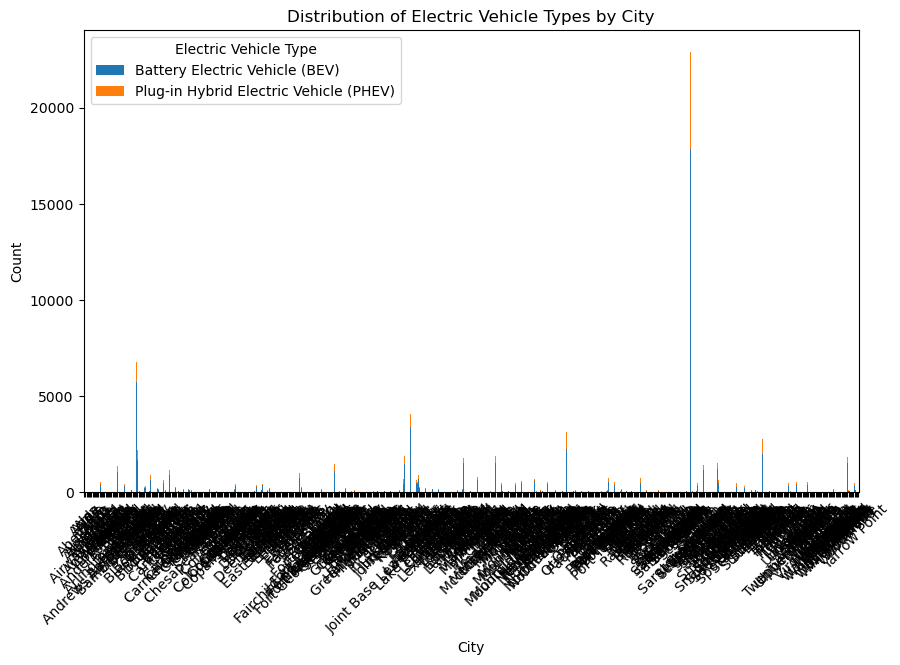

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV data from the URL into a DataFrame
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

print(df.columns)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'No']
non_clean_car_types = non_clean_cars[['Make', 'Electric Vehicle Type']]
print("Cars and Types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_car_types)

# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars = df[(df['Make'] == 'TESLA') & (df['City'] == 'BOTHELL')]
tesla_car_details = tesla_cars[['Model Year', 'Model']]
print("TESLA cars with Model Year and Model Type made in Bothell City:")
print(tesla_car_details)

# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
electric_cars_list = electric_cars['Electric Vehicle Type']
print("Cars with Electric Range > 100 and made after 2015:")
print(electric_cars_list)

# Draw plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(10,20))
city_ev_type_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()    # grouping the data with 'City', 'Electric Vehicle Type' and restructuring row to column
city_ev_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.legend(title='Electric Vehicle Type')
plt.xticks(rotation=45)
plt.show()


## Question 10 -

Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.

Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

Example Output -

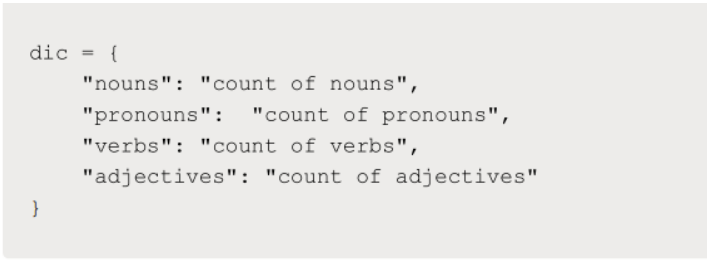

In [44]:
import nltk

# Downloading the 'nltk' resources

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('corpus')

In [39]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Set the data path explicitly
nltk.data.path.append("C:\\Users\\Sai\\AppData\\Roaming\\nltk_data")

def count_pos_tags(text):
    # Tokenizing the text into words
    words = word_tokenize(text)

    # part-of-speech tagging
    tagged_words = nltk.pos_tag(words)    # each word in a text is assigned its appropriate morphosyntactic(morphology based on syntax) category

    # Initializing counters
    noun_count = 0
    verb_count = 0
    pronoun_count = 0
    adjective_count = 0

    # Counting the occurrences of each POS tag
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            noun_count += 1
        elif tag.startswith('VB'):  # Verb
            verb_count += 1
        elif tag.startswith('PR'):  # Pronoun
            pronoun_count += 1
        elif tag.startswith('JJ'):  # Adjective
            adjective_count += 1

    # dictionary with the counts for each category
    pos_counts = {
        "nouns": noun_count,
        "pronouns": pronoun_count,
        "verbs": verb_count,
        "adjectives": adjective_count
    }

    return pos_counts

**Testcase-1 -**

Text: "I love to learning and exploring new DataScience concepts and to create automated solution"

Output: {'nouns': 3, 'pronouns': 1, 'verbs': 4, 'adjectives': 2}

Explanation: In the given sentence, there are 3 nouns ('learning', 'exploring', 'concepts'), 2 pronouns ('I', 'Data'), 4 verbs ('love', 'learning', 'exploring', 'create'), and 2 adjectives ('new', 'automated').

In [49]:
if __name__ == '__main__':
    text = input()
    print(count_pos_tags(text))

I love to learning and exploring new DataScience concepts and to create automated solution
{'nouns': 3, 'pronouns': 1, 'verbs': 4, 'adjectives': 2}


**Testcase-2 -**

Text: "I love to practice Python and SQL problems everyday"

Output: {'nouns': 4, 'pronouns': 1, 'verbs': 2, 'adjectives': 0}

Explanation: There are 4 nouns ('practice', 'Python', 'SQL', 'problems'), 1 pronoun ('I'), 3 verbs ('love', 'practice', 'everyday'), and 0 adjectives.

In [48]:
if __name__ == '__main__':
    text = input()
    print(count_pos_tags(text))

I love to practice Python and SQL problems everyday
{'nouns': 4, 'pronouns': 1, 'verbs': 2, 'adjectives': 0}


<h1><center>Thank you</center></h1>